In [42]:
#https://www.kaggle.com/fedesoriano/heart-failure-prediction
import pandas as pd
df = pd.read_csv('U:\Courses\Slides\CMP466\codes\Preprocessing\heart.csv')
print(df.shape)
df.head(10)#prints the first n rows (default 5)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
# To drop any columns (feature selection manually)
# Pass a list of column names to the columns parameter to drop multiple columns
#df.drop(columns=['Cholesterol', 'MaxHR'])
#df.drop(columns=['Age']) # to drop age

# Pass a list of column numbers to the columns parameter to drop multiple columns
#df.drop(df.columns[[1, 3, 7]], axis=1) #to drop columns 1,3 and 7, axis =1 means accross columns, while axis =0 accross rows


In [43]:
x =df.iloc[:,0:11]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [44]:
y = df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config

nomi_col=[2,6,10]
ordi_col=[1,8]
num_col=[0,3,4,5,7,9]

trans = make_column_transformer((OneHotEncoder(sparse=False),nomi_col),
                               (OrdinalEncoder(),ordi_col),
                               (MinMaxScaler(),num_col),
                                remainder='passthrough')
#set_config(display='diagram')
#trans
x_preprocessed= trans.fit_transform(x) #x_preprocessed is numpy object
x_preprocessed[:5,:] #print the first 5 records


array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.24489796, 0.7       , 0.47927032,
        0.        , 0.78873239, 0.29545455],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.42857143, 0.8       , 0.29850746,
        0.        , 0.67605634, 0.40909091],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.18367347, 0.65      , 0.46932007,
        0.        , 0.26760563, 0.29545455],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.40816327, 0.69      , 0.35489221,
        0.        , 0.33802817, 0.46590909],
    

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_preprocessed,y,test_size= 0.2)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [77]:
y_pred=knn.predict (x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [75]:
print(knn.score(x_train,y_train))

0.8637602179836512


In [76]:
print(knn.score(x_test,y_test))

0.8913043478260869


In [81]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']#optional
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87        76
     class 1       0.92      0.90      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [90]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[67,  9],
       [11, 97]], dtype=int64)

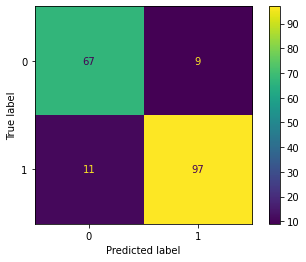

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= knn.classes_)
disp.plot()


In [100]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1) #pos_label is the label for the positive class
#remember if you have a multi-class problem, the class of interest will be considered the positive class and the rest are negatives

In [99]:
metrics.auc(fpr, tpr)

0.8898635477582845